In [ ]:
import os

import pandas as pd
import spatialdata as sd
from gseapy import Biomart

/home/sergio/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/sergio/.local/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/sergio/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
bm = Biomart()

In [3]:
# queries ={'gene_id': ['ACTA2'] } # need to be a dict object
results = bm.query(dataset="mmusculus_gene_ensembl", attributes=["ensembl_gene_id", "external_gene_name", "entrezgene_id", "go_id"])

In [4]:
### biological process= extracellular_transport
results[results["go_id"] == "GO:0006858"]

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
51607,ENSMUSG00000031930,Wwp2,66894,GO:0006858
332888,ENSMUSG00000014402,Tsg101,22088,GO:0006858
399152,ENSMUSG00000026972,Arrdc1,215705,GO:0006858


In [8]:
### cellular_component= extracellular_vesicle
extracellular_vesicle = results[results["go_id"] == "GO:1903561"]

# Read adata

In [6]:
xenium_path_cropped = "/media/sergio/Discovair_final/mousebrain_prime_crop_points2regions_annotated.zarr"
output_path = "/media/sergio/Discovair_final/analysis_crop"
sdata = sd.read_zarr(xenium_path_cropped)

/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argum

In [7]:
adata = sdata["table"]

In [14]:
import scanpy as sc

exvesicle = adata.var.index[adata.var.index.isin(extracellular_vesicle["external_gene_name"])]
sc.tl.score_genes(adata, exvesicle, score_name="exrna")

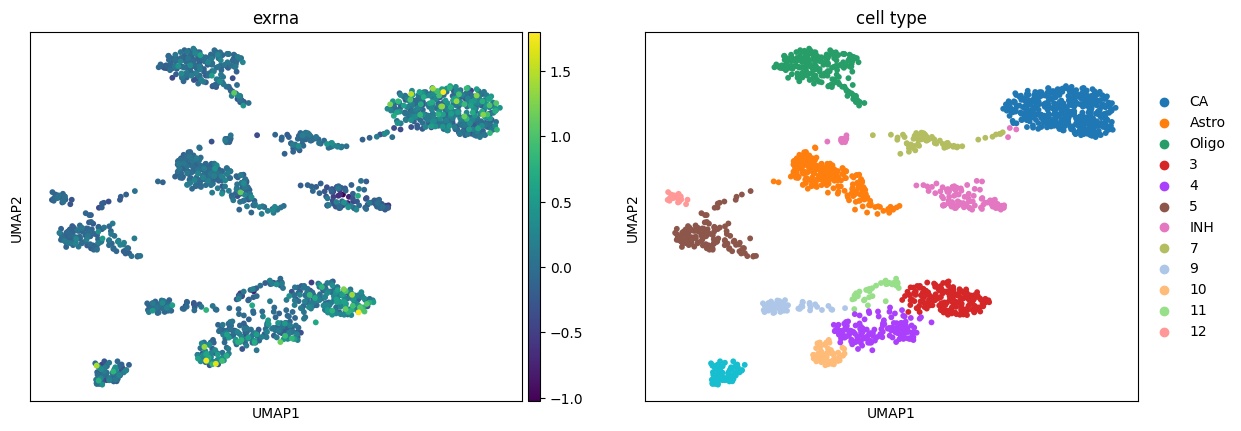

In [17]:
sc.pl.umap(adata, color=["exrna", "cell type"])

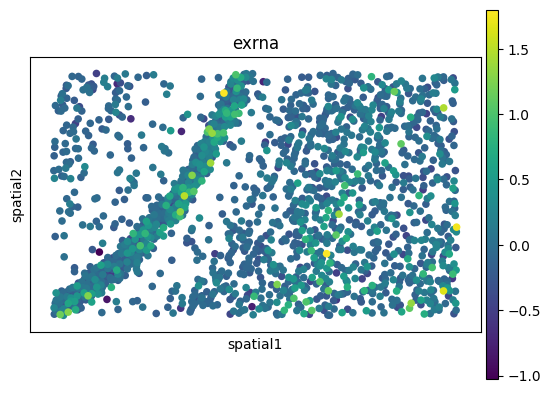

In [19]:
sc.pl.spatial(adata, color="exrna", spot_size=20)

In [21]:
exvesicle

Index(['Apoa1', 'Apoa4', 'Arc', 'Peg10', 'Slc11a2'], dtype='object')

In [27]:
exrna_prop = pd.read_parquet(os.path.join(output_path, "extracellular_proportion_of_transcripts.parquet"))

In [28]:
exrna_prop.loc[exvesicle, :]

missegmentation_associated,intracellular_proportion,extracellular_proportion
Apoa1,0.000000,1.000000
Apoa4,0.051613,0.948387
Arc,0.312104,0.687896
Peg10,0.020101,0.979899
Slc11a2,0.024129,0.975871


In [29]:
exrna_prop.head()

missegmentation_associated,intracellular_proportion,extracellular_proportion
feature_name,,
Kif5a,0.771106,0.228894
Camk2a,0.766310,0.233690
Ndrg2,0.594129,0.405871
Nsmf,0.559888,0.440112
Dlg4,0.534478,0.465522


# Colormaps

In [138]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def get_palette(name="default", n_colors=None):
    """
    Returns a discrete color palette as a list of hex codes.

    Parameters
    ----------
    - name (str): Name of the palette ("default", "coolwarm", "viridis", etc.).
    - n_colors (int, optional): Number of colors to return. If None, return all.

    Returns
    -------
    - list of hex color codes.
    """
    palettes = {
        "30colors": [
            "#0FCCAC",
            "#ED2073",
            "#123755",
            "#BFCE00",
            "#DF5AFF",
            "#FFFF7B",
            "#FC911D",
            "#E891B4",
            "#C1F4C5",
            "#37BEE2",
            "#790DB7",
            "#9CCE00",
            "#43FBFF",
            "#F7C894",
            "#BCBCBC",
            "#444444",
            "#096858",
            "#3A8458",
            "#0000C9",
            "#FF5757",
            "#990E0E",
            "#754B19",
            "#CC882F",
            "#FF00F3",
            "#C4A7C2",
            "#9CFFFC",
            "#00E50B",
            "#000000",
            "#FF3600",
            "#FFC088",
        ],
        "calid_colors": [
            "#ED2073",
            "#ebd234",
            "#FC911D",
            "#E891B4",
            "#F7C894",
            "#FF5757",
            "#990E0E",
            "#754B19",
            "#CC882F",
            "#FF00F3",
            "#FF3600",
            "#FFC088",
            "#DF5AFF",
        ],
        "cold_colors": [
            "#0FCCAC",
            "#123755",
            "#C1F4C5",
            "#37BEE2",
            "#790DB7",
            "#9CCE00",
            "#43FBFF",
            "#BCBCBC",
            "#444444",
            "#096858",
            "#3A8458",
            "#0000C9",
            "#C4A7C2",
            "#9CFFFC",
            "#00E50B",
            "#000000",
            "#BFCE00",
        ],
        "BuPi": ["#123755", "#DBDBDB", "#ED2073"],
        "Pinks": ["white", "#ED2073"],
        "Aquas": ["white", "#0FCCAC"],
        "GnPi": ["#0FCCAC", "#ED2073"],
        "coolwarm": sns.color_palette("coolwarm", as_cmap=False),
        "viridis": sns.color_palette("viridis", as_cmap=False),
        "muted": sns.color_palette("muted"),
        "troutpy": ["#123755", "#0FCCAC"],
        "troutpy_reversed": ["#0FCCAC", "#123755"],
    }

    if name not in palettes:
        raise ValueError(f"Palette '{name}' not found. Available palettes: {list(palettes.keys())}")

    palette = palettes[name]
    return palette[:n_colors] if n_colors else palette


def get_colormap(name="default"):
    """
    Returns a continuous colormap for Matplotlib.

    Parameters
    ----------
    - name (str): Name of the colormap ("default", "coolwarm", "viridis", etc.).

    Returns
    -------
    - matplotlib.colors.Colormap object.
    """
    colormaps = {
        "30colors": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("30colors")),
        "cold_colors": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("cold_colors")),
        "calid_colors": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("calid_colors")),
        "BuPi": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("BuPi")),
        "GnPi": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("GnPi")),
        "Pinks": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("Pinks")),
        "Aquas": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("Aquas")),
        "troutpy": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("troutpy")),
        "troutpy_reversed": mcolors.LinearSegmentedColormap.from_list("custom_cmap", get_palette("troutpy_reversed")),
        "coolwarm": plt.get_cmap("coolwarm"),
        "viridis": plt.get_cmap("viridis"),
    }

    if name not in colormaps:
        raise ValueError(f"Colormap '{name}' not found. Available colormaps: {list(colormaps.keys())}")

    return colormaps[name]

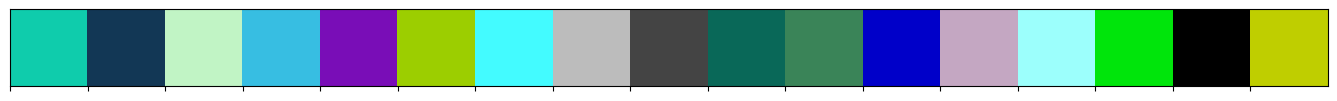

In [139]:
# from colors import get_palette

palette = get_palette("cold_colors", n_colors=30)
sns.set_palette(palette)

sns.palplot(palette)
plt.show()

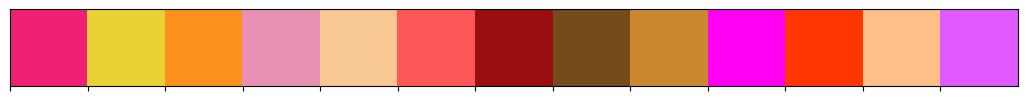

In [140]:
# from colors import get_palette
import seaborn as sns

palette = get_palette("calid_colors", n_colors=30)
sns.set_palette(palette)

sns.palplot(palette)
plt.show()

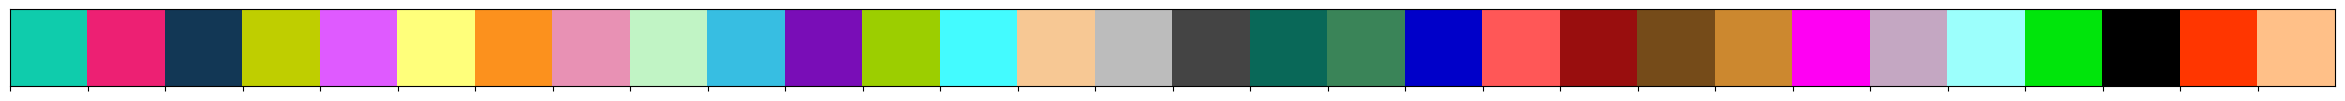

In [141]:
# from colors import get_palette
import seaborn as sns

palette = get_palette("30colors", n_colors=30)
sns.set_palette(palette)

sns.palplot(palette)
plt.show()

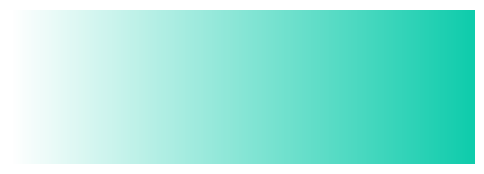

In [143]:
# from colors import get_colormap
import matplotlib.pyplot as plt

cmap = get_colormap("Aquas")

# Display the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect="auto", cmap=cmap)
plt.axis("off")
plt.show()